Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,750,051 (18.12 MB)

 Trainable params: 4,750,049 (18.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

file size :  28998
file recv
-----------------------------------
file save
-----------------------------------


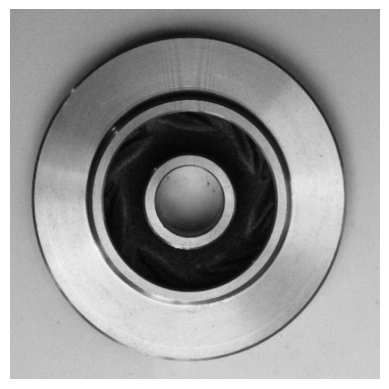

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
send int byte :  b'\x01\x00\x00\x00'
-----------------------------------
file size :  28998
file recv
-----------------------------------
file save
-----------------------------------


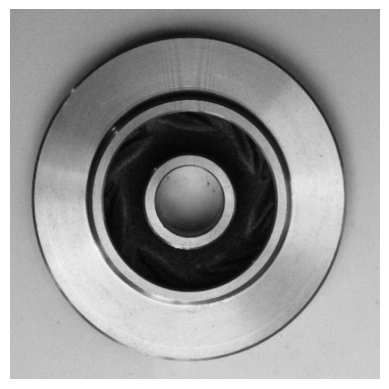

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
send int byte :  b'\x01\x00\x00\x00'
-----------------------------------
file size :  28998
file recv
-----------------------------------
file save
-----------------------------------


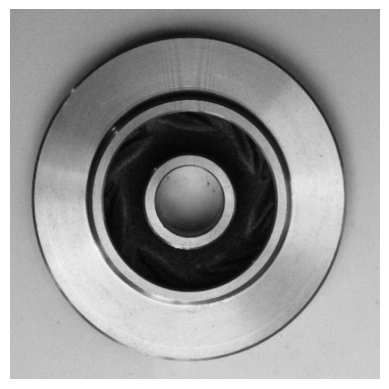

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
send int byte :  b'\x01\x00\x00\x00'
-----------------------------------


KeyboardInterrupt: 

In [40]:
import socket
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image

n_ip = '10.10.20.99'
n_port = 20202
n_image_path = 'C:/Users/lms/Documents/Cmfc_cnn_python/SAVE/cast.jpeg'
model = load_model('C:/Users/lms/Documents/Visual Studio 2022/Case_cnn.h5')
model.summary()

# n_ip = '10.10.20.112'
# n_port = 21000

while True:
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect((n_ip, n_port))

    file_size_bytes = client_socket.recv(1024)
    file_size_int = int.from_bytes(file_size_bytes, byteorder='little')
    print("file size : ", file_size_int)
    
    received_data = b""
    data = client_socket.recv(file_size_int)
    received_data += data
    print("file recv")
    print("-----------------------------------")
    with open(n_image_path, 'wb') as f:
        f.write(received_data)
        
    print("file save")
    print("-----------------------------------")
    n_img = mpimg.imread(n_image_path)
    plt.imshow(n_img)
    plt.axis('off')
    plt.show()
    f.close()

    # 이미지 검사
    test_img = image.load_img(n_image_path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')
    x = image.img_to_array(test_img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    # 모델로 이미지 검사하기
    classes = model.predict(images, batch_size=10)
    result_int = int(0)
    if classes[0]==0:
        result_int = int(1)
    to_serv = result_int.to_bytes(4, byteorder='little')
    print("send int byte : ", to_serv)
    sent = client_socket.send(to_serv)
    print("-----------------------------------")
    time.sleep(1)

client_socket.close()